# Práctica 6 : Support Vector Machines
#### Realizado por Javier Gómez Moraleda y Unai Piris Ibañez

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import sklearn.svm as skl
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
from algorithm.process_email import email2TokenList
from algorithm.get_vocab_dict import getVocabDict
import codecs

In [2]:
# Función para la carga de ficheros
def load_file(path, val = False):
    m = loadmat(path)
    X = m['X']
    y = m['y'].ravel()
    
    if(val):
        Xval = m['Xval']
        yval = m['yval'].ravel()
        return X, y, Xval, yval
    else:
        return X, y

## Parte 1 - Support Vector Machines

En esta primera parte vamos a familiarizarnos con el clasificador SVM. Primero vamos a definir un par de funciones que nos van a ser útiles.

In [3]:
# Dibuja una gráfica con los datos
def drawData(X,y):
    neg = (y == 0)
    pos = (y == 1)
    
    plt.figure()
    plt.scatter(X[pos, 0], X[pos, 1], color='black', marker='+')
    plt.scatter(X[neg, 0], X[neg, 1], color='yellow', edgecolors='black', marker='o')

In [4]:
# Dibuja la recta frontera
def visualize_boundary(X, y, svm, marginX1 = [0,0],marginX2 = [0,0]):
    x1 = np.linspace(X[:, 0].min()-marginX1[0], X[:, 0].max()+marginX1[1], 100)
    x2 = np.linspace(X[:, 1].min()-marginX2[0], X[:, 1].max()+marginX2[1], 100)
    x1, x2 = np.meshgrid(x1, x2)
    print(svm.predict(np.array([x1.ravel(), x2.ravel()]).T))
    yp = svm.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)
    plt.figure()
    drawData(X,y)
    plt.contour(x1, x2, yp)
    plt.show()
    plt.close()

### Kernel lineal

In [5]:
# Carga de los datos
X, y = load_file('data/ex6data1.mat')
print("X: ", X.shape)
print("y: ", y.shape)

X:  (51, 2)
y:  (51,)


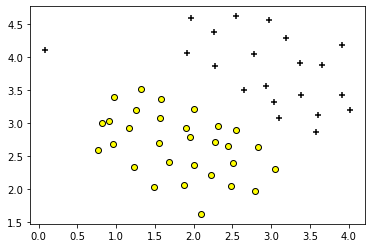

In [6]:
# Visualización de los datos
drawData(X,y)

[0 0 0 ... 1 1 1]


<Figure size 432x288 with 0 Axes>

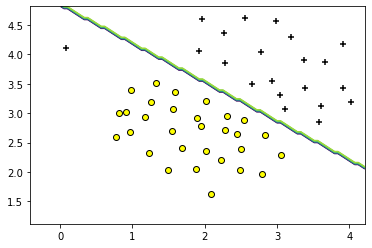

In [7]:
# Entrenamiento del clasificador con C = 1
svm = skl.SVC(C=1.0, kernel = 'linear')
svm.fit(X,y)
visualize_boundary(X, y, svm,[0.5,0.2],[0.5,0.2])

[0 0 0 ... 1 1 1]


<Figure size 432x288 with 0 Axes>

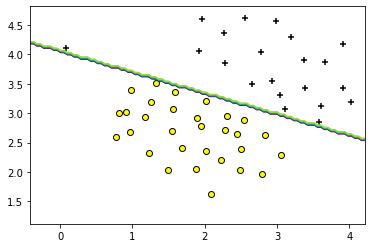

In [8]:
# Entrenamiento del clasificador con C = 100
svm = skl.SVC(C=100.0, kernel = 'linear')
svm.fit(X,y)
visualize_boundary(X, y, svm,[0.5,0.2],[0.5,0.2])

### Kernel gaussiano

In [9]:
# Carga de los datos
X, y = load_file('data/ex6data2.mat')
print("X: ", X.shape)
print("y: ", y.shape)

X:  (863, 2)
y:  (863,)


[1 1 1 ... 1 1 1]


<Figure size 432x288 with 0 Axes>

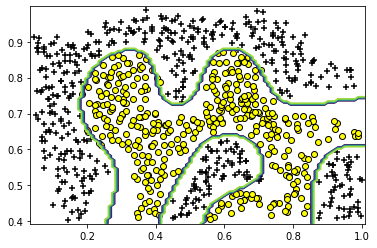

In [10]:
# Entrenamiento del clasificador con C = 1
svm = skl.SVC(C=1.0, kernel = 'rbf', gamma= 1 / (2 * 0.1**2))
svm.fit(X,y)
visualize_boundary(X, y, svm,[0.01,0.01],[0.01,0.01])

### Elección de los parámetros C y σ

In [11]:
# Carga de los datos
X, y, Xval, yval = load_file('data/ex6data3.mat', True)
print("X: ", X.shape)
print("y: ", y.shape)
print("Xval: ", Xval.shape)
print("yval: ", yval.shape)

X:  (211, 2)
y:  (211,)
Xval:  (200, 2)
yval:  (200,)


In [12]:
# Entrenamos el modelo con distintos valores de C y de sigma
C_vec = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
sigma_vec = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
scores = np.zeros((len(C_vec), len(sigma_vec)))

for i in range(0, len(C_vec)):
    for j in range(0, len(sigma_vec)):
        svm = skl.SVC(C=C_vec[i], kernel = 'rbf', gamma= 1 / (2 * sigma_vec[j]**2))
        svm.fit(X,y)
        yvalp = svm.predict(Xval)
        
        hits = np.sum(yvalp == yval) / len(yval)
        scores[i, j] = hits*100

In [13]:
# Matriz de porcentajes de aciertos obtenida
print(scores)

[[43.5 43.5 43.5 43.5 43.5 43.5 43.5 43.5]
 [43.5 43.5 45.  86.  62.  43.5 43.5 43.5]
 [43.5 43.5 94.5 91.  82.5 43.5 43.5 43.5]
 [43.5 75.5 96.  92.5 89.  74.  43.5 43.5]
 [60.5 90.5 96.5 96.5 92.5 84.5 43.5 43.5]
 [62.  89.  96.5 94.5 93.  89.  72.  43.5]
 [62.  89.  94.  95.5 93.5 92.  84.5 43.5]
 [62.  89.  94.  96.  92.5 92.5 89.  74. ]]


In [14]:
# Obtenemos los índices de los valores máximos
indexes = np.where(scores == np.amax(scores))
indexes_list = list(zip(indexes[0], indexes[1]))
print(indexes_list)

[(4, 2), (4, 3), (5, 2)]


In [15]:
# Nos quedamos con el primer valor máximo que aparece
c_max_index = indexes_list[0][0]
c_max = C_vec[c_max_index]
sigma_max_index = indexes_list[0][1]
sigma_max = C_vec[sigma_max_index]

[1 1 1 ... 1 1 1]


<Figure size 432x288 with 0 Axes>

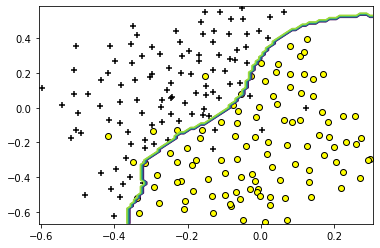

C = 1 , sigma = 0.1 , porcentaje acertado:  96.5 %


In [16]:
# Entrenamos y observamos el resultado
svm = skl.SVC(C=c_max, kernel = 'rbf', gamma= 1 / (2 * sigma_max**2))
svm.fit(X,y)
visualize_boundary(X, y, svm,[0.01,0.01],[0.01,0.01])
print("C =", c_max, ", sigma =", sigma_max, ", porcentaje acertado: ", scores[c_max_index, sigma_max_index], "%")

## Parte 2 - Detección de spam

En esta parte vamos a utilizar las funciones para el cálculo de modelos SVM que hemos probado en la primera parte para realizar detecciones de spam en correos.

In [17]:
# Carga de correos
def load_emails(file, examples, dictionary):
    res = np.zeros((examples, len(dictionary)))
    file = "data/"+ file
    for i in range(examples):
        email_contents = codecs.open('{0}/{1:04d}.txt'.format(file, i+1), 'r',encoding='utf-8', errors='ignore').read()
        email_contents = email2TokenList(email_contents)
        res[i] = emailToVect(email_contents,dictionary)
    return res

In [18]:
# Transforma el email en un vector
def emailToVect(email, dictionary):
    vect = np.zeros(len(dictionary))
    for word in email:
        if word in dictionary.keys():
            vect[dictionary.get(word)-1] += 1
            
    return vect

### Preprocesamiento de los datos

In [19]:
# Cargamos todos los ejemplos
dictionary = getVocabDict()
XEHam = load_emails("easy_ham", 2551, dictionary)
XHHam = load_emails("hard_ham", 250, dictionary)
XSpam = load_emails("spam", 500, dictionary)

In [20]:
# Creamos las salidas(y) de cada dataset
yEHam = np.zeros(2551)
yHHam = np.zeros(250)
ySpam = np.ones(500)

In [21]:
# Separamos cada dataset en train, test y val (60%, 20%, 20%)
XEHamTrain, XEHamTest, yEHamTrain, yEHamTest = train_test_split(XEHam, yEHam, test_size = 0.20, random_state = 42)
XHHamTrain, XHHamTest, yHHamTrain, yHHamTest = train_test_split(XHHam, yHHam, test_size = 0.20, random_state = 42)
XSpamTrain, XSpamTest, ySpamTrain, ySpamTest = train_test_split(XSpam, ySpam, test_size = 0.20, random_state = 42)

XEHamTrain, XEHamVal, yEHamTrain, yEHamVal = train_test_split(XEHamTrain, yEHamTrain, test_size = 0.25, random_state = 42)
XHHamTrain, XHHamVal, yHHamTrain, yHHamVal = train_test_split(XHHamTrain, yHHamTrain, test_size = 0.25, random_state = 42)
XSpamTrain, XSpamVal, ySpamTrain, ySpamVal = train_test_split(XSpamTrain, ySpamTrain, test_size = 0.25, random_state = 42)

In [22]:
# Creamos la XTrain, XTest y XVal(cada uno de ellos tendra: 33% datos de EHam, 33% de HHam y 33% de Spam)
XTrain = np.concatenate((XEHamTrain, XHHamTrain, XSpamTrain))
XTest = np.concatenate((XEHamTest, XHHamTest, XSpamTest))
XVal = np.concatenate((XEHamVal, XHHamVal, XSpamVal))

# Creamos yTrain, yTest e yVal
yTrain = np.concatenate((yEHamTrain, yHHamTrain, ySpamTrain))
yTest = np.concatenate((yEHamTest, yHHamTest, ySpamTest))
yVal = np.concatenate((yEHamVal, yHHamVal, ySpamVal))

### Cálculo de C y σ óptimos

Vamos a entrenar el modelo con distintos valores de C y σ para encontrar el que consigue un mayor porcentaje de aciertos.

In [23]:
# Inicialización de las variables
C_vec = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
sigma_vec = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
scores = np.zeros((len(C_vec), len(sigma_vec)))

# Entrenamiento
for i in range(0, len(C_vec)):
    for j in range(0, len(sigma_vec)):
        svm = skl.SVC(C=C_vec[i], kernel = 'rbf', gamma= 1 / (2 * sigma_vec[j]**2))
        svm.fit(XTrain,yTrain)
        yvalp = svm.predict(XVal)
        
        hits = np.sum(yvalp == yVal) / len(yVal)
        scores[i, j] = hits*100

In [24]:
# Matriz de porcentajes de aciertos obtenida
print(scores)

[[84.84848485 84.84848485 84.84848485 84.84848485 84.84848485 84.84848485
  84.84848485 84.84848485]
 [84.84848485 84.84848485 84.84848485 84.84848485 84.84848485 84.84848485
  84.84848485 84.84848485]
 [84.84848485 84.84848485 84.84848485 84.84848485 84.84848485 85.45454545
  84.84848485 84.84848485]
 [85.         85.         85.         85.         85.60606061 86.36363636
  89.39393939 88.63636364]
 [89.6969697  89.6969697  89.6969697  89.6969697  89.6969697  90.90909091
  94.54545455 93.33333333]
 [89.6969697  89.6969697  89.6969697  89.6969697  89.6969697  91.66666667
  95.45454545 95.        ]
 [89.6969697  89.6969697  89.6969697  89.6969697  89.6969697  91.66666667
  95.45454545 96.36363636]
 [89.6969697  89.6969697  89.6969697  89.6969697  89.6969697  91.81818182
  95.60606061 96.81818182]]


In [25]:
# Obtenemos los índices de los valores máximos
indexes = np.where(scores == np.amax(scores))
indexes_list = list(zip(indexes[0], indexes[1]))
print(indexes_list)

[(7, 7)]


In [26]:
# Nos quedamos con el primer valor máximo que aparece (en este caso es único)
c_max_index = indexes_list[0][0]
c_max = C_vec[c_max_index]
sigma_max_index = indexes_list[0][1]
sigma_max = C_vec[sigma_max_index]

In [27]:
# Entrenamos y observamos el resultado
svm = skl.SVC(C=c_max, kernel = 'rbf', gamma= 1 / (2 * sigma_max**2))
svm.fit(XTrain, yTrain)
ytestp = svm.predict(XTest)
hits = np.sum(ytestp == yTest) / len(yTest)
scores = hits*100
print("C =", c_max, ", sigma =", sigma_max, ", porcentaje acertado: ", scores, "%")

C = 30 , sigma = 30 , porcentaje acertado:  97.57942511346445 %
